# Import Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os

%matplotlib inline

In [66]:
import glob

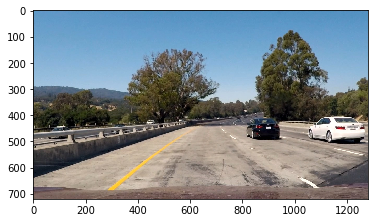

In [2]:
image = mpimg.imread('test_images/test1.jpg')
plt.imshow(image)

# Lane Detection Pipeline

This section performs the following operations to detect (and draw) lanes in a frame:

1. Camera calibration
2. Perspective warp
3. Sobel filter
4. Histogram peak extraction
5. Sliding window lane search
6. Searching from prior lane bounds (look-ahead filter)
7. Inverse perspective warp


## Basic Test Pipeline

A basic pipeline will be developed to test on a set of test images. This provides core functionality to the entire pipeline, and includes the following:

### Image Pre-Processing
1. Camera calibration
2. Perspective warp

### Lane Detection
1. Sobel filter
2. Histogram peak extraction
3. Sliding window lane search

### Visualization
1. Inverse perspective warp

## Camera Calibration

In [67]:
images = glob.glob('camera_cal/calibration*.jpg')

In [74]:
valid_images = 0
total_images = len(os.listdir('camera_cal'))

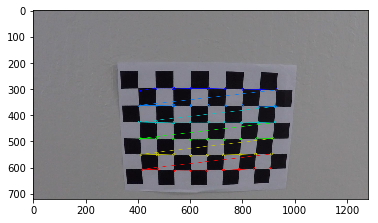

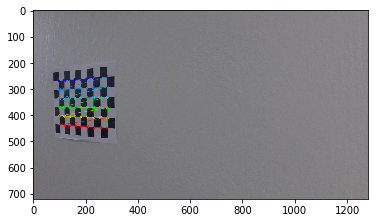

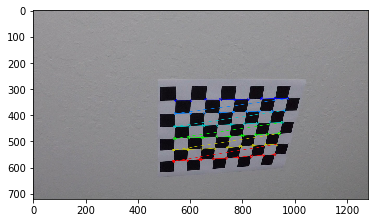

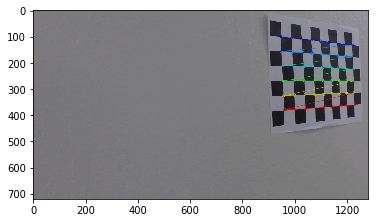

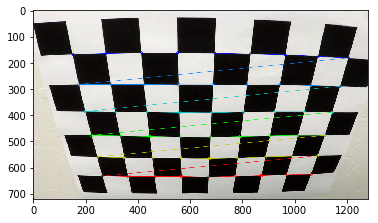

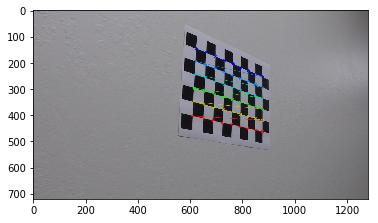

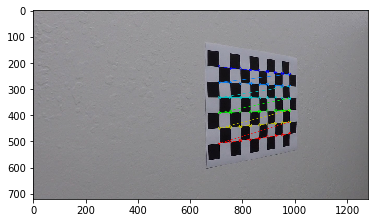

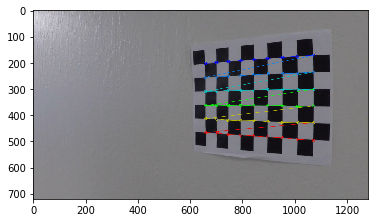

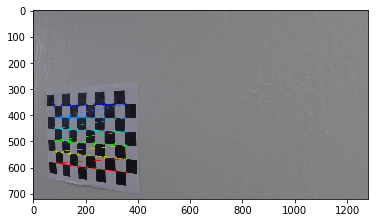

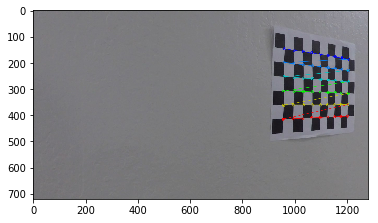

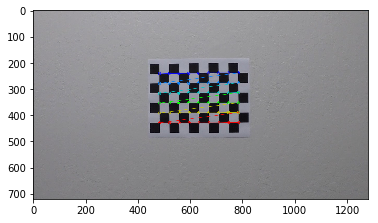

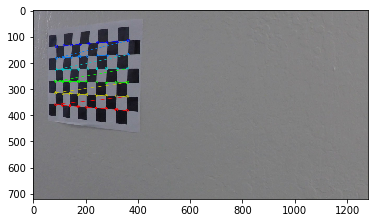

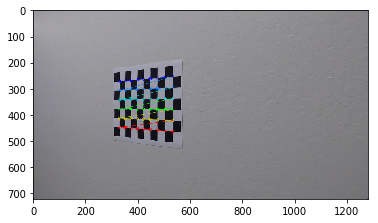

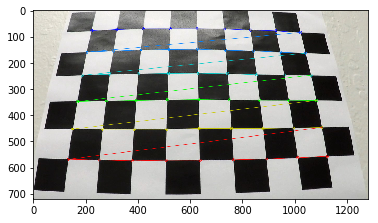

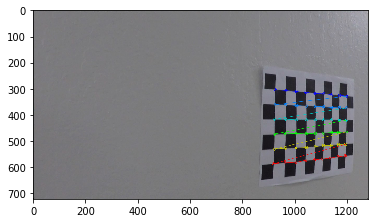

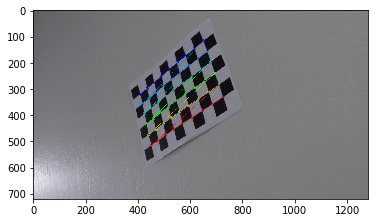

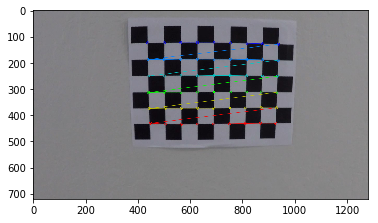

In [75]:
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in the image plane

nx = 9 # Number of grids in x-axis
ny = 6 # Number of grids in y-axis

objp = np.zeros((nx*ny, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

for image in images:
    img = mpimg.imread(image)
    # Creating a grayscale image for the corner detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    #TODO: Add 8-bit image check, which is necessary if a .png is imported instead of a .jpg
    # Conversion is (gray*255).astype(np.uint8)

    # Finding chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If corners are found, add the object and image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        valid_images+=1
        # Uncomment to visualize the corners
        # img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        # plt.imshow(img)
        # plt.show()

In [76]:
print('{} of the {} calibration images were valid'.format(valid_images, total_images))

17 of the 20 calibration images were valid
